In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df = pd.read_csv('../data/retail_sales_dataset.csv')
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [159]:
df.shape


(1000, 9)

In [160]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [161]:
df.drop_duplicates(inplace=True)


In [162]:
df.fillna(method='ffill', inplace=True)


C:\Users\Saptami pai\AppData\Local\Temp\ipykernel_15768\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [163]:
total_sales = df['Total Amount'].sum()
total_sales


np.int64(456000)

In [164]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

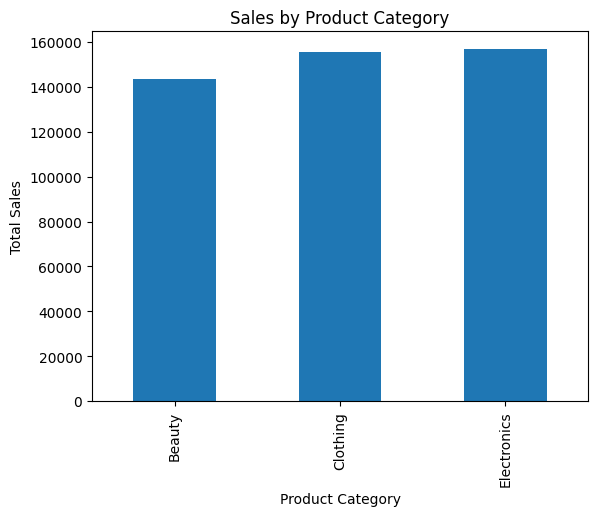

In [165]:
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


In [166]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month


In [167]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales


Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

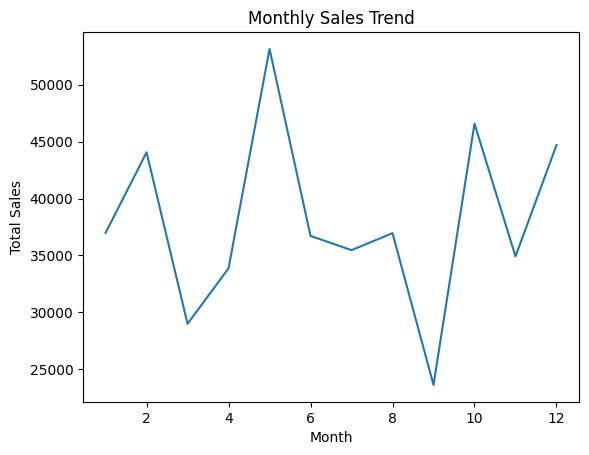

In [168]:
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [169]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
top_customers


Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
Name: Total Amount, dtype: int64

In [170]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

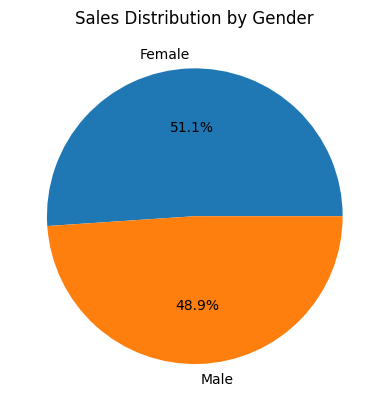

In [171]:
gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Gender')
plt.ylabel('')
plt.show()
